In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Shipment_Data.xlsx')

In [4]:
df.drop('Unnamed: 0',1,inplace=True)

C:\Users\Vivek\AppData\Local\Temp/ipykernel_4724/291486388.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('Unnamed: 0',1,inplace=True)


In [5]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4.0,2.0,177.0,3.0,low,F,44.0,1233.0,1
1,2,F,Flight,4.0,5.0,216.0,2.0,low,M,59.0,3088.0,1
2,3,A,Flight,2.0,2.0,183.0,4.0,low,M,48.0,3374.0,1
3,4,B,Flight,3.0,3.0,176.0,4.0,medium,M,10.0,1177.0,1
4,5,C,Flight,2.0,2.0,184.0,3.0,medium,F,46.0,2484.0,1


In [7]:
df.shape

(10999, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10977 non-null  object 
 2   Mode_of_Shipment     10976 non-null  object 
 3   Customer_care_calls  10974 non-null  float64
 4   Customer_rating      10975 non-null  float64
 5   Cost_of_the_Product  10977 non-null  float64
 6   Prior_purchases      10979 non-null  float64
 7   Product_importance   10968 non-null  object 
 8   Gender               10975 non-null  object 
 9   Discount_offered     10985 non-null  float64
 10  Weight_in_gms        10974 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.0+ MB


In [12]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Warehouse_block        0.200018
Mode_of_Shipment       0.209110
Customer_care_calls    0.227293
Customer_rating        0.218202
Cost_of_the_Product    0.200018
Prior_purchases        0.181835
Product_importance     0.281844
Gender                 0.218202
Discount_offered       0.127284
Weight_in_gms          0.227293
Reached.on.Time_Y.N    0.000000
dtype: float64

In [7]:
df.std()

ID                     3175.282140
Customer_care_calls       1.141802
Customer_rating           1.413954
Cost_of_the_Product      48.064551
Prior_purchases           1.521092
Discount_offered         16.192870
Weight_in_gms          1635.173033
Reached.on.Time_Y.N       0.490584
dtype: float64

# Understanding each variable

# ID

In [8]:
df['ID'].nunique()

10999

# Warehouse_block

In [9]:
df['Warehouse_block'].value_counts().sort_values()

C    1827
B    1829
A    1829
D    1832
F    3660
Name: Warehouse_block, dtype: int64

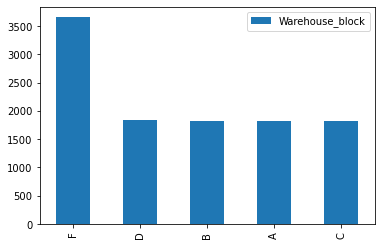

In [10]:
df['Warehouse_block'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

In [11]:
#F block has stored twice the number of products that has been stored in the other in other individual blocks
#so we can assume that this block has more storage capacity than the other Warehouse_block

# Mode_of_Shipment

In [12]:
df['Mode_of_Shipment'].value_counts(normalize=True)

Ship      0.678663
Flight    0.161534
Road      0.159803
Name: Mode_of_Shipment, dtype: float64

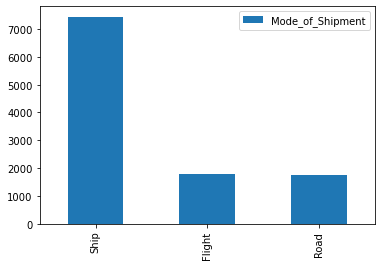

In [13]:
df['Mode_of_Shipment'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

In [14]:
# 68% of the shipment is done via ship

# Customer_care_calls

In [15]:
df['Customer_care_calls'].value_counts()

4.0    3545
3.0    3212
5.0    2324
6.0    1010
2.0     637
7.0     246
Name: Customer_care_calls, dtype: int64

<AxesSubplot:>

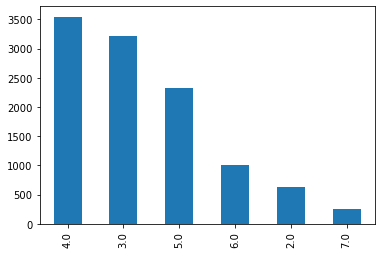

In [16]:
df['Customer_care_calls'].value_counts().plot(kind='bar')

In [17]:
df['Customer_care_calls'].describe()

count    10974.000000
mean         4.054310
std          1.141802
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


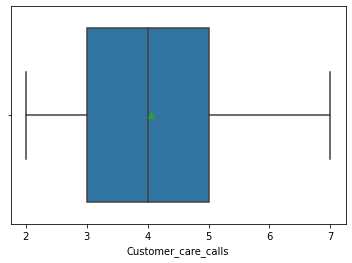

In [18]:
sns.boxplot(df['Customer_care_calls'],showmeans=True)
plt.show()

In [19]:
# on an average each order gets 4 calls
# and from the data we can say that each order gets atleast 2 calls

# Customer_rating

In [20]:
df['Customer_rating'].value_counts()

1.0    2232
3.0    2231
4.0    2184
5.0    2167
2.0    2161
Name: Customer_rating, dtype: int64

<AxesSubplot:>

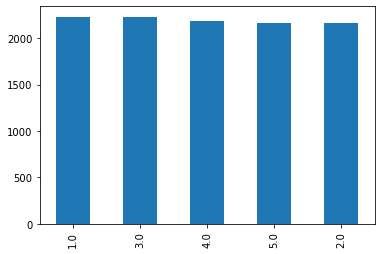

In [21]:
df['Customer_rating'].value_counts().plot(kind='bar')

In [22]:
df['Customer_rating'].describe()

count    10975.000000
mean         2.990251
std          1.413954
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Customer_rating, dtype: float64

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


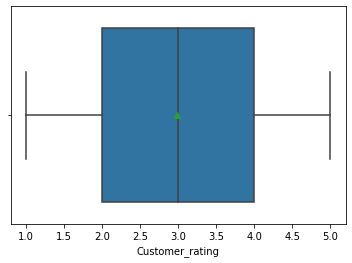

In [23]:
sns.boxplot(df['Customer_rating'],showmeans=True)
plt.show()

In [24]:
# on an average each the customer rating is 3 and our goal is to move the mean toward right

# Cost_of_the_Product

In [25]:
df['Cost_of_the_Product'].describe()

count    10977.000000
mean       210.199144
std         48.064551
min         96.000000
25%        170.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


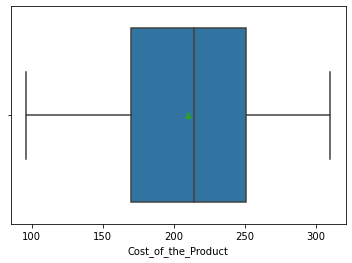

In [26]:
sns.boxplot(df['Cost_of_the_Product'],showmeans=True)
plt.show()

In [27]:
# the range varies from 96 to 310

# Prior_purchases

In [28]:
df['Prior_purchases'].value_counts()

3.0     3949
2.0     2595
4.0     2150
5.0     1285
6.0      560
10.0     176
7.0      136
8.0      128
Name: Prior_purchases, dtype: int64

<AxesSubplot:>

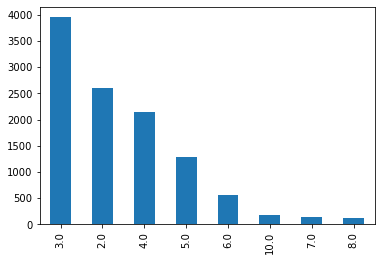

In [29]:
df['Prior_purchases'].value_counts().plot(kind='bar')

In [30]:
df['Prior_purchases'].describe()

count    10979.000000
mean         3.566627
std          1.521092
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


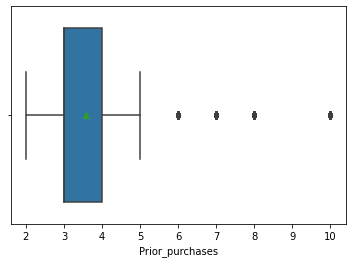

In [31]:
sns.boxplot(df['Prior_purchases'],showmeans=True)
plt.show()

In [32]:
# every customer has prior purchases and on an average 3 purchases has been done before

# Product_importance

In [33]:
df['Product_importance'].value_counts(normalize=True)

low       0.481400
medium    0.432622
high      0.085977
Name: Product_importance, dtype: float64

<AxesSubplot:>

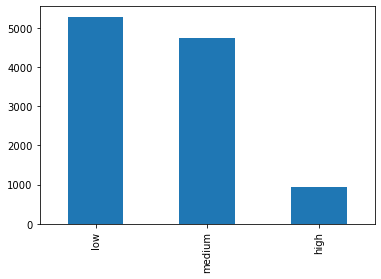

In [34]:
df['Product_importance'].value_counts().plot(kind='bar')

In [35]:
# 48% - low importance products
# 43% - medium importance products
# 8% - high importance products

# gender

<AxesSubplot:>

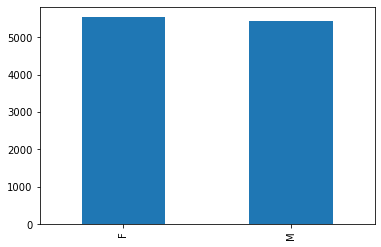

In [36]:
df['Gender'].value_counts().plot(kind='bar')

In [37]:
# We have the same gender proportion.

# Discount_offered

In [38]:
df['Discount_offered'].describe()

count    10985.000000
mean        13.365043
std         16.192870
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


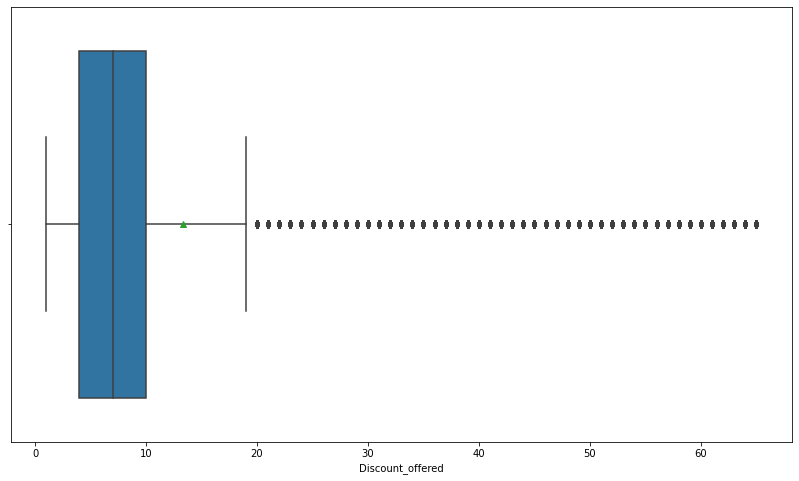

In [39]:
plt.figure(figsize=(14,8))
sns.boxplot(df['Discount_offered'],showmeans=True)
plt.show()

C:\Users\balar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

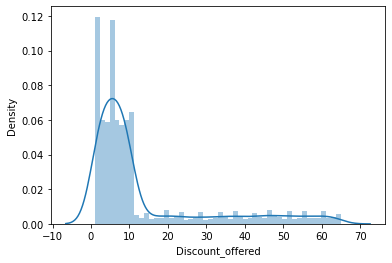

In [40]:
sns.distplot(df['Discount_offered'])

In [41]:
# about 75% of the product has been offered discount of less than 10%

# Weight_in_gms

In [42]:
df['Weight_in_gms'].describe()

count    10974.000000
mean      3634.021323
std       1635.173033
min       1001.000000
25%       1840.000000
50%       4149.000000
75%       5048.750000
max       7846.000000
Name: Weight_in_gms, dtype: float64

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


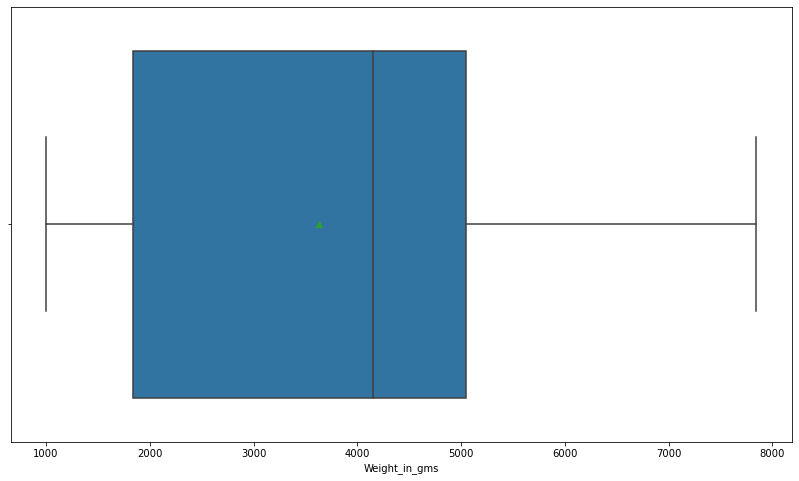

In [43]:
plt.figure(figsize=(14,8))
sns.boxplot(df['Weight_in_gms'],showmeans=True)
plt.show()

In [44]:
# weight ranges between 1kg-8kg

# Reached.on.Time_Y.N

In [45]:
df['Reached.on.Time_Y.N'].value_counts(normalize=1)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

<AxesSubplot:>

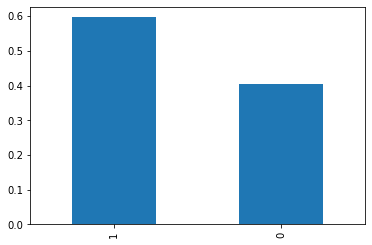

In [46]:
df['Reached.on.Time_Y.N'].value_counts(normalize=1).plot(kind='bar')

In [47]:
#The ratio is 6:4, it is not much imbalanced, so we proceed with the same trend as the training set learns the same
#pattern.

# How variables related to each other

# Reached.on.Time_Y.N

In [48]:
df['Reached.on.Time_Y.N']=df['Reached.on.Time_Y.N'].astype(str)

In [49]:
pd.crosstab(df['Reached.on.Time_Y.N'],df['Warehouse_block'], normalize='columns')

Warehouse_block,A,B,C,D,F
Reached.on.Time_Y.N,,,,,
0,0.413341,0.397485,0.402299,0.401747,0.401913
1,0.586659,0.602515,0.597701,0.598253,0.598087


In [50]:
pd.crosstab(df['Reached.on.Time_Y.N'],df['Mode_of_Shipment'], normalize='columns')

Mode_of_Shipment,Flight,Road,Ship
Reached.on.Time_Y.N,,,
0,0.398195,0.412201,0.402604
1,0.601805,0.587799,0.597396


In [51]:
pd.crosstab(df['Reached.on.Time_Y.N'],df['Customer_care_calls'], normalize='columns')

Customer_care_calls,2.0,3.0,4.0,5.0,6.0,7.0
Reached.on.Time_Y.N,,,,,,
0,0.346939,0.374222,0.402821,0.416093,0.485149,0.48374
1,0.653061,0.625778,0.597179,0.583907,0.514851,0.51626


In [52]:
# in all the number of customer care calls made, the percentage of not reaching on time is high compared with 
# reaching on time
# but the trend is increasing with 0 and decreasing with 1.

In [53]:
pd.crosstab(df['Reached.on.Time_Y.N'],df['Customer_rating'], normalize='columns')

Customer_rating,1.0,2.0,3.0,4.0,5.0
Reached.on.Time_Y.N,,,,,
0,0.412634,0.411846,0.393097,0.404762,0.393632
1,0.587366,0.588154,0.606903,0.595238,0.606368


In [54]:
df.drop('ID',1).groupby('Reached.on.Time_Y.N').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,
0,4.149085,2.967910,214.480135,3.669229,5.545475,4168.249831
1,3.990225,3.005344,207.302429,3.497407,18.651663,3272.782649


# Reached on time vs Discount offered

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

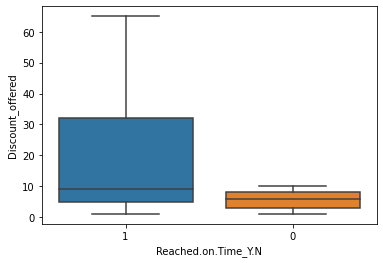

In [55]:
sns.boxplot(df['Reached.on.Time_Y.N'],df['Discount_offered'])

In [56]:
# products with higher discounts is not reaching on time

# Reached on time vs Weight in gms

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

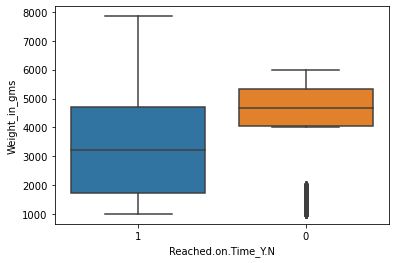

In [57]:
sns.boxplot(df['Reached.on.Time_Y.N'],df['Weight_in_gms'])

In [58]:
# products lighter in weight is not reaching on time

# Reached on time vs Product importance

In [59]:
pd.crosstab(df['Reached.on.Time_Y.N'],df['Product_importance'], normalize='columns')

Product_importance,high,low,medium
Reached.on.Time_Y.N,,,
0,0.351007,0.407576,0.409484
1,0.648993,0.592424,0.590516


<AxesSubplot:xlabel='Reached.on.Time_Y.N'>

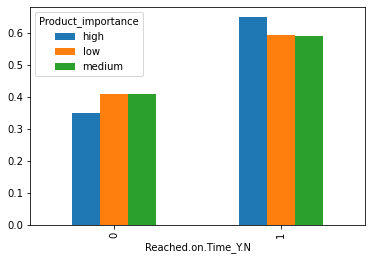

In [60]:
pd.crosstab(df['Reached.on.Time_Y.N'],df['Product_importance'], normalize='columns').plot(kind='bar')

In [61]:
# 65% of the product that has high importance has not reached on time, where as other products have a low ratio compared to it

In [62]:
pd.crosstab(df['Reached.on.Time_Y.N'],df['Gender'], normalize='columns')

Gender,F,M
Reached.on.Time_Y.N,,
0,0.405059,0.400551
1,0.594941,0.599449


C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

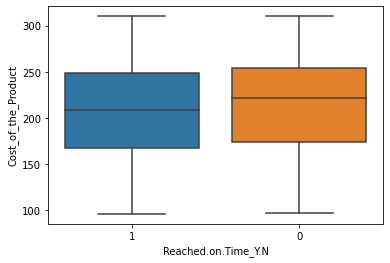

In [63]:
sns.boxplot(df['Reached.on.Time_Y.N'],df['Cost_of_the_Product'])

# Warehouse_block

In [64]:
pd.crosstab(df['Warehouse_block'],df['Mode_of_Shipment'],normalize='index')

Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,0.162459,0.159166,0.678375
B,0.161644,0.160000,0.678356
C,0.161184,0.160088,0.678728
D,0.161837,0.159103,0.679060
F,0.161193,0.160099,0.678708


In [65]:
pd.crosstab(df['Warehouse_block'],df['Customer_care_calls'],normalize='index')

Customer_care_calls,2.0,3.0,4.0,5.0,6.0,7.0
Warehouse_block,,,,,,
A,0.056955,0.302300,0.320920,0.204819,0.094195,0.020811
B,0.064039,0.292830,0.321839,0.220580,0.082102,0.018610
C,0.058662,0.287281,0.325658,0.207785,0.100329,0.020285
D,0.057566,0.301535,0.318531,0.200658,0.094298,0.027412
F,0.055327,0.286771,0.324843,0.218570,0.090934,0.023555


In [66]:
df.drop('ID',1).groupby('Warehouse_block').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Warehouse_block,,,,,,
A,4.039430,2.959519,208.876232,3.579178,13.238382,3612.307608
B,4.019704,2.980822,212.224959,3.575724,13.175698,3635.345036
C,4.064693,2.991776,211.011519,3.554521,13.442371,3642.057597
D,4.054825,3.014803,210.908046,3.598248,13.088026,3630.741370
F,4.073678,2.996714,209.124863,3.547247,13.635120,3639.324849


C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_care_calls', ylabel='Warehouse_block'>

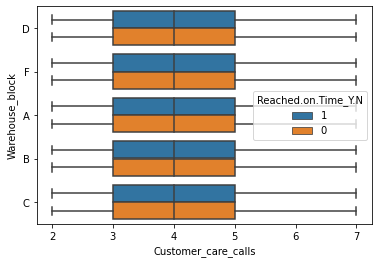

In [67]:
sns.boxplot(df['Customer_care_calls'],df['Warehouse_block'],hue=df['Reached.on.Time_Y.N'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_rating', ylabel='Warehouse_block'>

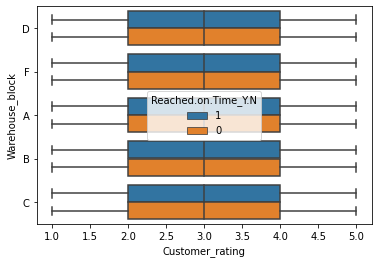

In [68]:
sns.boxplot(df['Customer_rating'],df['Warehouse_block'],hue=df['Reached.on.Time_Y.N'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Warehouse_block'>

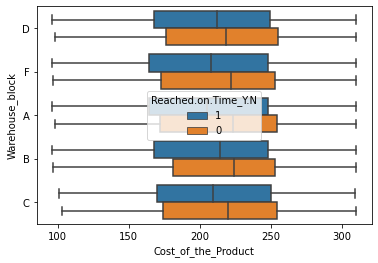

In [69]:
sns.boxplot(df['Cost_of_the_Product'],df['Warehouse_block'],hue=df['Reached.on.Time_Y.N'])

In [70]:
df.pivot_table(index='Warehouse_block',columns='Reached.on.Time_Y.N',values='Cost_of_the_Product',aggfunc=np.mean)

Reached.on.Time_Y.N,0,1
Warehouse_block,,
A,214.366402,204.997196
B,216.756198,209.237057
C,214.333787,208.772268
D,214.348299,208.592491
F,213.507493,206.179029


C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prior_purchases', ylabel='Warehouse_block'>

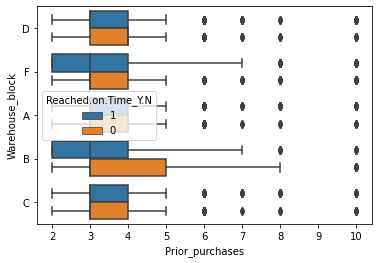

In [71]:
sns.boxplot(df['Prior_purchases'],df['Warehouse_block'],hue=df['Reached.on.Time_Y.N'])

# Warehouse_block vs Discount_offered

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_offered', ylabel='Warehouse_block'>

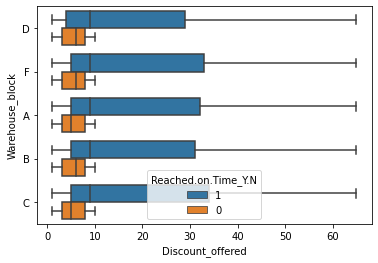

In [72]:
sns.boxplot(df['Discount_offered'],df['Warehouse_block'],hue=df['Reached.on.Time_Y.N'])

In [73]:
# in all blocks products with higher discounts is not reaching on time

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_in_gms', ylabel='Warehouse_block'>

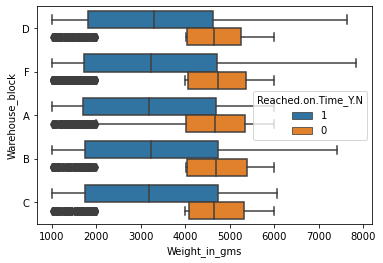

In [74]:
sns.boxplot(df['Weight_in_gms'],df['Warehouse_block'],hue=df['Reached.on.Time_Y.N'])

In [75]:
# in all blocks products lighter in weight is not reaching on time

In [76]:
pd.crosstab(df['Warehouse_block'],df['Product_importance'])

Product_importance,high,low,medium
Warehouse_block,,,
A,165,903,754
B,145,851,830
C,165,870,787
D,165,879,781
F,301,1769,1581


In [77]:
pd.crosstab(df['Warehouse_block'],df['Product_importance'],normalize='index')

Product_importance,high,low,medium
Warehouse_block,,,
A,0.090560,0.495609,0.413831
B,0.079409,0.466046,0.454545
C,0.090560,0.477497,0.431943
D,0.090411,0.481644,0.427945
F,0.082443,0.484525,0.433032


In [78]:
pd.crosstab(df['Warehouse_block'],df['Gender'],normalize='index')

Gender,F,M
Warehouse_block,,
A,0.505747,0.494253
B,0.495890,0.504110
C,0.505488,0.494512
D,0.509589,0.490411
F,0.505747,0.494253


In [79]:
pd.crosstab(df['Warehouse_block'],df['Reached.on.Time_Y.N'],normalize='index')

Reached.on.Time_Y.N,0,1
Warehouse_block,,
A,0.413341,0.586659
B,0.397485,0.602515
C,0.402299,0.597701
D,0.401747,0.598253
F,0.401913,0.598087


# Mode of shipment

In [80]:
df.drop('ID',1).groupby('Mode_of_Shipment').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Mode_of_Shipment,,,,,,
Flight,4.105085,2.985302,209.297007,3.566667,13.160835,3629.252685
Road,4.063465,2.993703,210.517714,3.574857,13.084475,3651.669336
Ship,4.041039,2.992604,210.353289,3.564282,13.483060,3631.443234


C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_care_calls', ylabel='Mode_of_Shipment'>

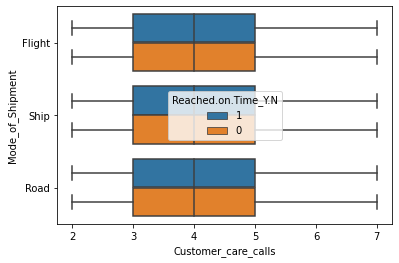

In [81]:
sns.boxplot(df['Customer_care_calls'],df['Mode_of_Shipment'],hue=df['Reached.on.Time_Y.N'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_rating', ylabel='Mode_of_Shipment'>

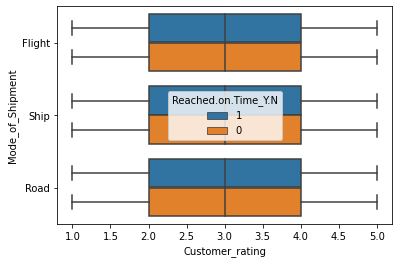

In [82]:
sns.boxplot(df['Customer_rating'],df['Mode_of_Shipment'],hue=df['Reached.on.Time_Y.N'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Mode_of_Shipment'>

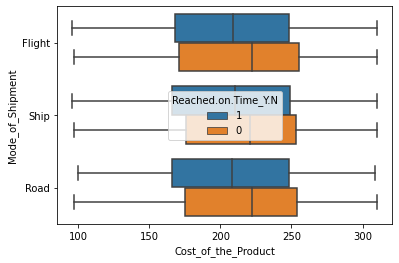

In [83]:
sns.boxplot(df['Cost_of_the_Product'],df['Mode_of_Shipment'],hue=df['Reached.on.Time_Y.N'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prior_purchases', ylabel='Mode_of_Shipment'>

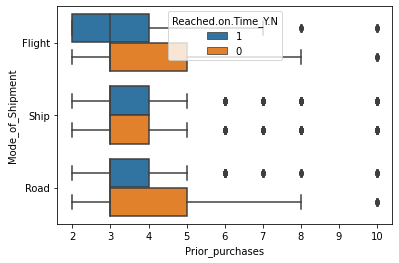

In [84]:
sns.boxplot(df['Prior_purchases'],df['Mode_of_Shipment'],hue=df['Reached.on.Time_Y.N'])

In [85]:
pd.crosstab(df['Prior_purchases'],df['Mode_of_Shipment'],normalize='columns')

Mode_of_Shipment,Flight,Road,Ship
Prior_purchases,,,
2.0,0.234463,0.232571,0.237762
3.0,0.355367,0.373143,0.357316
4.0,0.192655,0.180000,0.200646
5.0,0.133333,0.116000,0.113367
6.0,0.045763,0.059429,0.050161
7.0,0.014689,0.012571,0.011834
8.0,0.010169,0.008571,0.012776
10.0,0.013559,0.017714,0.016138


C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_offered', ylabel='Mode_of_Shipment'>

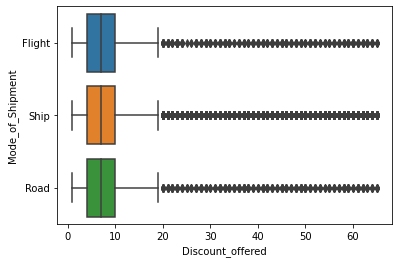

In [86]:
sns.boxplot(df['Discount_offered'],df['Mode_of_Shipment'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_offered', ylabel='Mode_of_Shipment'>

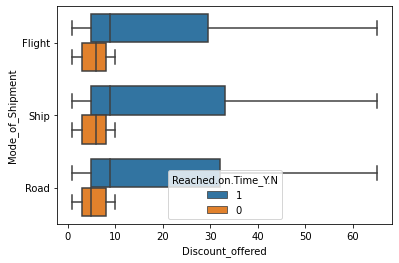

In [87]:
sns.boxplot(df['Discount_offered'],df['Mode_of_Shipment'],hue=df['Reached.on.Time_Y.N'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_in_gms', ylabel='Mode_of_Shipment'>

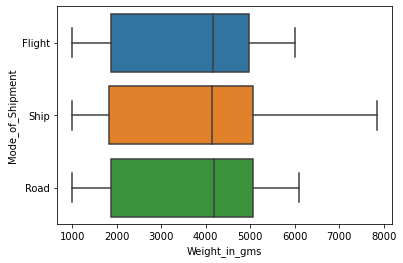

In [88]:
sns.boxplot(df['Weight_in_gms'],df['Mode_of_Shipment'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_in_gms', ylabel='Mode_of_Shipment'>

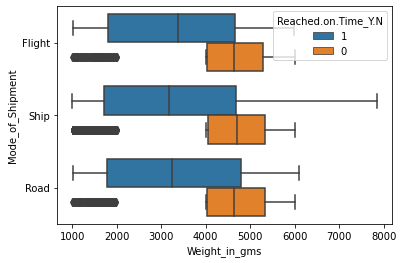

In [89]:
sns.boxplot(df['Weight_in_gms'],df['Mode_of_Shipment'],hue=df['Reached.on.Time_Y.N'])

In [90]:
pd.crosstab(df['Mode_of_Shipment'],df['Product_importance'],normalize='index')

Product_importance,high,low,medium
Mode_of_Shipment,,,
Flight,0.091577,0.471453,0.436970
Road,0.090337,0.485420,0.424242
Ship,0.083883,0.482833,0.433284


In [91]:
pd.crosstab(df['Mode_of_Shipment'],df['Gender'],normalize='index')

Gender,F,M
Mode_of_Shipment,,
Flight,0.485037,0.514963
Road,0.514840,0.485160
Ship,0.506798,0.493202


# Product importance

In [92]:
pd.crosstab(df['Product_importance'],df['Warehouse_block'],normalize='index')

Warehouse_block,A,B,C,D,F
Product_importance,,,,,
high,0.175345,0.154091,0.175345,0.175345,0.319872
low,0.171282,0.161419,0.165023,0.166730,0.335546
medium,0.159307,0.175364,0.166279,0.165012,0.334038


In [93]:
pd.crosstab(df['Product_importance'],df['Mode_of_Shipment'],normalize='index')

Mode_of_Shipment,Flight,Road,Ship
Product_importance,,,
high,0.171792,0.167550,0.660657
low,0.158284,0.161131,0.680585
medium,0.163321,0.156772,0.679907


In [94]:
df.drop('ID',1).groupby('Product_importance').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Product_importance,,,,,,
high,3.874735,2.985106,203.810840,3.653191,14.662420,4010.161530
low,4.112291,2.982929,212.061302,3.528463,13.017454,3495.721769
medium,4.027913,2.998098,209.406672,3.592022,13.484919,3709.527784


C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Customer_care_calls'>

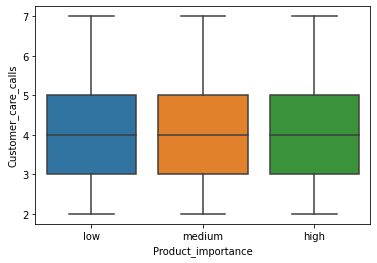

In [95]:
sns.boxplot(df['Product_importance'],df['Customer_care_calls'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Customer_rating'>

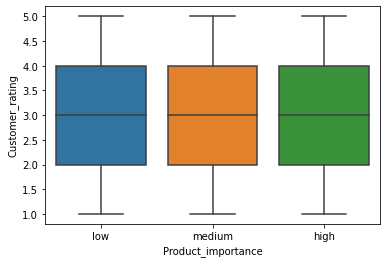

In [96]:
sns.boxplot(df['Product_importance'],df['Customer_rating'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Cost_of_the_Product'>

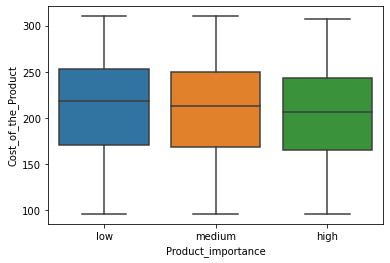

In [97]:
sns.boxplot(df['Product_importance'],df['Cost_of_the_Product'])

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Prior_purchases'>

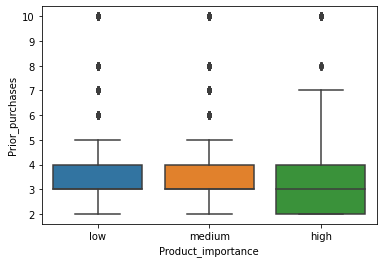

In [98]:
sns.boxplot(df['Product_importance'],df['Prior_purchases'])

In [99]:
pd.crosstab(df['Product_importance'],df['Prior_purchases'],normalize='columns')

Prior_purchases,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
Product_importance,,,,,,,,
high,0.096102,0.095831,0.063869,0.039844,0.066308,0.191176,0.125,0.267045
low,0.466615,0.470005,0.520280,0.554688,0.476703,0.205882,0.375,0.250000
medium,0.437283,0.434164,0.415851,0.405469,0.456989,0.602941,0.500,0.482955


# Product importance vs Discount_offered

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Discount_offered'>

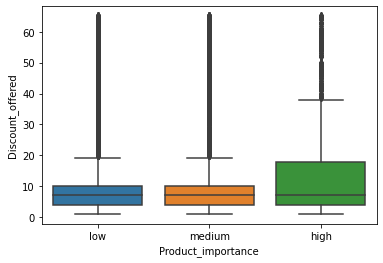

In [100]:
sns.boxplot(df['Product_importance'],df['Discount_offered'])

In [101]:
# more than 25% of the high importance products has a discount of more than 10%. Other product importance
# have only 25% of the products that has a discount of more than 10%

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Discount_offered'>

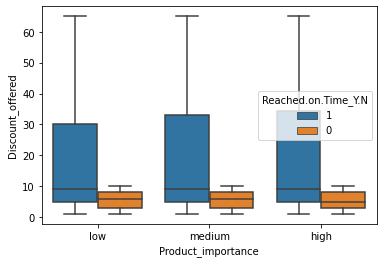

In [102]:
sns.boxplot(df['Product_importance'],df['Discount_offered'],hue=df['Reached.on.Time_Y.N'])

# Product importance vs Weight in gms

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Weight_in_gms'>

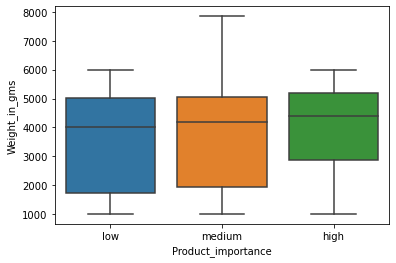

In [103]:
sns.boxplot(df['Product_importance'],df['Weight_in_gms'])

In [104]:
# only medium importance product has weight of 6-8kg

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_importance', ylabel='Weight_in_gms'>

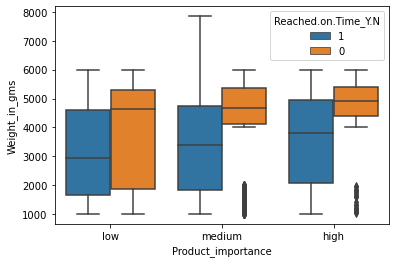

In [105]:
sns.boxplot(df['Product_importance'],df['Weight_in_gms'],hue=df['Reached.on.Time_Y.N'])

# Cost_of_the_Product vs Customer_care_calls

C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

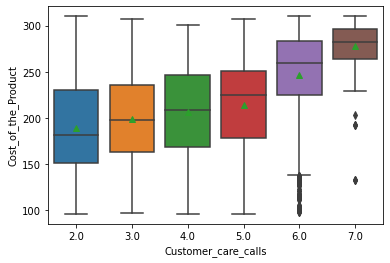

In [106]:
sns.boxplot(df['Customer_care_calls'],df['Cost_of_the_Product'],showmeans = True)

In [107]:
#when number of customer call increases then Median and average cost of the products increases.
#Maximum number of calls are made when average cost of the product is around $270
#There are few outliers in 6 customer care calls

# Cost_of_the_Product vs Discount_offered

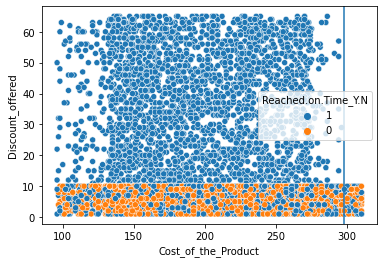

In [108]:
sns.scatterplot(y=df['Discount_offered'],x=df['Cost_of_the_Product'],hue=df['Reached.on.Time_Y.N'])
plt.axvline(x=298)

In [109]:
#Products with more discount generally took more time to deliver irrespective of the cost.
#More Products with  discount between the range $0 to $10 are delivered on time irrespective of the cost.

# Cost_of_the_Product vs Weight_in_gms

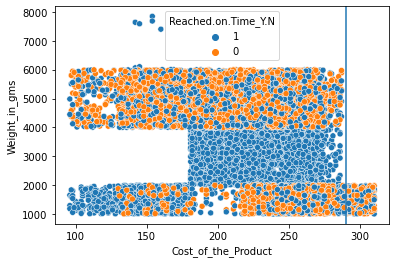

In [110]:
sns.scatterplot(y=df['Weight_in_gms'],x=df['Cost_of_the_Product'],hue=df['Reached.on.Time_Y.N'])
plt.axvline(x=290)

In [111]:
#Products with weight range from 2 to 4 kg doesn't reach on time.
#More number of Products with 4kg to 6 kg reaches on times and only less number of products not reached on time in this weight category.
#For heightest cost of the product (around $310) weight ranges from 1-2 kg

# Discount_offered vs Weight_in_gms

<AxesSubplot:xlabel='Discount_offered', ylabel='Weight_in_gms'>

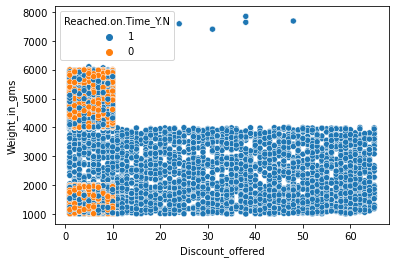

In [112]:
sns.scatterplot(x=df['Discount_offered'],y=df['Weight_in_gms'],hue=df['Reached.on.Time_Y.N'])

# Customer_care_calls vs Weight_in_gms

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Weight_in_gms'>

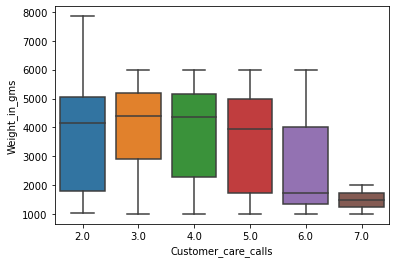

In [113]:
sns.boxplot(x=df['Customer_care_calls'],y=df['Weight_in_gms'])
#lower weight products like 1kg or 2kg purchased customers reached 6 to 7 times customer care

# correlation

In [114]:
df['Reached.on.Time_Y.N']=df['Reached.on.Time_Y.N'].astype(int)

<AxesSubplot:>

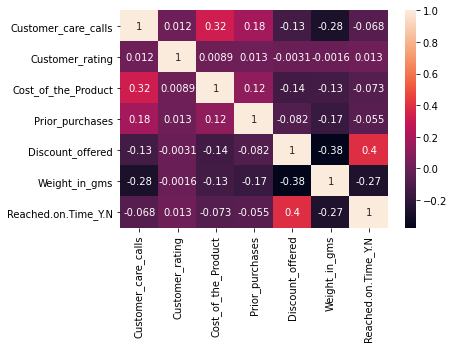

In [115]:
sns.heatmap(df.drop('ID',1).corr(),annot=True)

# missing value treatment

In [116]:
df.isna().sum()

ID                      0
Warehouse_block        22
Mode_of_Shipment       23
Customer_care_calls    25
Customer_rating        24
Cost_of_the_Product    22
Prior_purchases        20
Product_importance     31
Gender                 24
Discount_offered       14
Weight_in_gms          25
Reached.on.Time_Y.N     0
dtype: int64

In [117]:
((df.isna().sum())/len(df))*100

ID                     0.000000
Warehouse_block        0.200018
Mode_of_Shipment       0.209110
Customer_care_calls    0.227293
Customer_rating        0.218202
Cost_of_the_Product    0.200018
Prior_purchases        0.181835
Product_importance     0.281844
Gender                 0.218202
Discount_offered       0.127284
Weight_in_gms          0.227293
Reached.on.Time_Y.N    0.000000
dtype: float64

In [118]:
df['Warehouse_block'].fillna(df['Warehouse_block'].mode()[0],inplace=True)
df['Mode_of_Shipment'].fillna(df['Mode_of_Shipment'].mode()[0],inplace=True)
df['Customer_rating'].fillna(df['Customer_rating'].mode()[0],inplace=True)
df['Prior_purchases'].fillna(df['Prior_purchases'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Product_importance'].fillna(df['Product_importance'].mode()[0],inplace=True)

In [119]:
df['Weight_in_gms'].fillna(df['Weight_in_gms'].median(),inplace=True)
df['Discount_offered'].fillna(df['Discount_offered'].median(),inplace=True)

In [120]:
df['Cost_of_the_Product'].fillna(df.groupby('Customer_care_calls')['Cost_of_the_Product'].transform('mean'),inplace=True) 

In [121]:
A= df[df['Customer_care_calls'].isna()].index

In [122]:
df.groupby('Customer_care_calls')['Cost_of_the_Product'].mean()

Customer_care_calls
2.0    189.628931
3.0    198.883786
4.0    206.406780
5.0    214.276916
6.0    246.646825
7.0    277.420408
Name: Cost_of_the_Product, dtype: float64

In [123]:
for i in A:
    if df.loc[i,'Cost_of_the_Product']<=189.628931:
        df.loc[i,'Customer_care_calls']=2
    if (df.loc[i,'Cost_of_the_Product']>189.628931) & (df.loc[i,'Cost_of_the_Product']<=198.883786):
        df.loc[i,'Customer_care_calls']=3
    if (df.loc[i,'Cost_of_the_Product']>198.883786) & (df.loc[i,'Cost_of_the_Product']<=206.406780):
        df.loc[i,'Customer_care_calls']=4
    if (df.loc[i,'Cost_of_the_Product']>206.406780) & (df.loc[i,'Cost_of_the_Product']<=214.276916):
        df.loc[i,'Customer_care_calls']=5
    if (df.loc[i,'Cost_of_the_Product']>214.276916) & (df.loc[i,'Cost_of_the_Product']<=246.646825):
        df.loc[i,'Customer_care_calls']=6
    if (df.loc[i,'Cost_of_the_Product']>246.646825) :
        df.loc[i,'Customer_care_calls']=7

In [124]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# statistical significance of variables

In [125]:
from scipy import stats

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  float64
 4   Customer_rating      10999 non-null  float64
 5   Cost_of_the_Product  10999 non-null  float64
 6   Prior_purchases      10999 non-null  float64
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  float64
 10  Weight_in_gms        10999 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  int32  
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 988.3+ KB


In [127]:
Cat= ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Customer_care_calls','Customer_rating','Prior_purchases']
Num= ['Cost_of_the_Product','Discount_offered','Weight_in_gms']

H0: The variables are independent

H1: The variables are dependent

In [128]:
for i in Cat:
    table=pd.crosstab(df['Reached.on.Time_Y.N'],df[i])
    observed_value = table.values
    observed_value
    test_stat, p, dof, expected_value = stats.chi2_contingency(observed = observed_value, correction = False)
    print('p value of',i,'is',p)

p value of Warehouse_block is 0.9007206555567301
p value of Mode_of_Shipment is 0.6728059239062216
p value of Product_importance is 0.002760734726303322
p value of Gender is 0.5597150305785878
p value of Customer_care_calls is 2.571118384515917e-10
p value of Customer_rating is 0.49539819318961187
p value of Prior_purchases is 2.529093788969353e-23


In [129]:
# only Product_importance,Customer_care_calls & Prior_purchases are significant

In [130]:
for i in Num:
    stat, p_value = stats.shapiro(df[i])
    print('p-value for',i,'is', p_value)

p-value for Cost_of_the_Product is 3.132462587151696e-41
p-value for Discount_offered is 0.0
p-value for Weight_in_gms is 0.0


C:\Users\balar\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [131]:
# not noramlly distributed

In [132]:
from scipy.stats import mannwhitneyu

H0: The mean is equal between the two groups

HA: The mean is not equal between the two groups

In [133]:
for i in Num:
    x= df[df['Reached.on.Time_Y.N']=='0'][i]
    y= df[df['Reached.on.Time_Y.N']=='1'][i]
    stat, p =mannwhitneyu(x, y, use_continuity=True)
    print('p-value for',i,'is', p_value)

p-value for Cost_of_the_Product is 0.0
p-value for Discount_offered is 0.0
p-value for Weight_in_gms is 0.0


C:\Users\balar\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [134]:
#reject h0, so all the variables are significant

# Scaling and encoding the data

In [135]:
df.drop('ID',1,inplace=True)

In [136]:
cat= df.drop(['Cost_of_the_Product','Discount_offered','Weight_in_gms'],1)
cat.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
0,D,Flight,4.0,2.0,3.0,low,F,1
1,F,Flight,4.0,5.0,2.0,low,M,1


In [137]:
num= df[['Cost_of_the_Product','Discount_offered','Weight_in_gms']]
num.head(2)

,Cost_of_the_Product,Discount_offered,Weight_in_gms
0,177.0,44.0,1233.0
1,216.0,59.0,3088.0


In [138]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [139]:
le= LabelEncoder()
oe= OrdinalEncoder(categories=[['low','medium','high']])
cat['Warehouse_block']= le.fit_transform(cat['Warehouse_block'])
cat['Mode_of_Shipment']= le.fit_transform(cat['Mode_of_Shipment'])
cat['Product_importance']=oe.fit_transform(cat['Product_importance'].values.reshape(-1,1))
cat['Gender']= le.fit_transform(cat['Gender'])

In [140]:
cat.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
0,3,0,4.0,2.0,3.0,0.0,0,1
1,4,0,4.0,5.0,2.0,0.0,1,1


In [141]:
from scipy.stats import zscore

In [142]:
num = pd.DataFrame(zscore(num),columns=num.columns)

In [143]:
dff= pd.concat([num,cat],1)
dff.head(2)

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
0,-0.691289,1.893485,-1.470649,3,0,4.0,2.0,3.0,0.0,0,1
1,0.120823,2.820360,-0.334997,4,0,4.0,5.0,2.0,0.0,1,1


In [144]:
df['Cost_of_the_Product'].skew()

-0.156799459991209

In [145]:
df['Discount_offered'].skew()

1.802228952470092

In [146]:
df['Weight_in_gms'].skew()

-0.252477163959786

In [147]:
df.groupby('Customer_care_calls').mean()[['Cost_of_the_Product','Weight_in_gms']]

,Cost_of_the_Product,Weight_in_gms
Customer_care_calls,,
2.0,189.154463,3697.341085
3.0,198.880747,4029.240199
4.0,206.406780,3856.976023
5.0,214.276916,3472.519793
6.0,246.534212,2472.807276
7.0,276.930789,1538.389764


<AxesSubplot:xlabel='Customer_care_calls'>

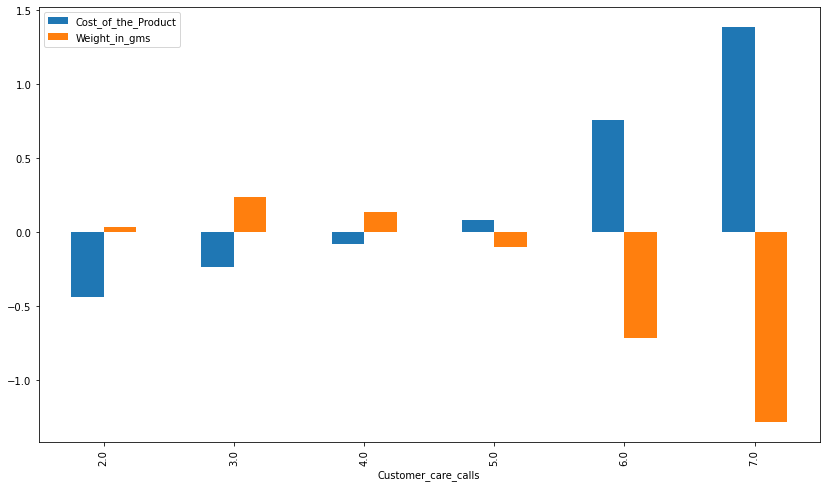

In [148]:
dff.groupby('Customer_care_calls').mean()[['Cost_of_the_Product','Weight_in_gms']].plot(kind='bar',figsize=(14,8))

# Model building

In [149]:
import statsmodels.api as sm

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
y = dff['Reached.on.Time_Y.N']
x= dff.drop('Reached.on.Time_Y.N',1)
x=sm.add_constant(x)

In [152]:
y.replace({0:1,1:0},inplace=True)

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=18)

In [154]:
base_model= sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.546732
         Iterations 8


In [155]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                 7699
Model:                           Logit   Df Residuals:                     7688
Method:                            MLE   Df Model:                           10
Date:                 Tue, 03 May 2022   Pseudo R-squ.:                  0.1902
Time:                         17:11:56   Log-Likelihood:                -4209.3
converged:                        True   LL-Null:                       -5198.2
Covariance Type:             nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2871      0.158     -8.137      0.000      -1.597      -0.977
Cost_of_the_Product     0.1074      0.029      3.731      0.000       0.051       0.164
Discount_offered       -1.8476      0.087    -21.346      0.000      -2.017      -1.678
Weight_in_gms           0.3647      0.031     11.695      0.000       0.304       0.426
Warehouse_block        -0.0078      0.017     -0.447      0.655      -0.042       0.026
Mode_of_Shipment        0.0333      0.035      0.964      0.335      -0.034       0.101
Customer_care_calls     0.0725      0.026      2.832      0.005       0.022       0.123
Customer_rating        -0.0315      0.018     -1.715      0.086      -0.068       0.005
Prior_purchases         0.0652      0.018      3.567      0.000       0.029       0.101
Product_importance     -0.1402      0.041     -3.387      0.001      -0.221      -0.059
Gender                 -0.0604      0.052     -1.159      0.246      -0.163       0.042
=======================================================================================
"""

In [156]:
from sklearn import metrics

In [157]:
y_pred= [1 if x>.5 else 0 for x in base_model.predict(x_train)]

In [158]:
metrics.recall_score(y_train,y_pred)

0.58263933376041

In [159]:
y_pred= [1 if x>.5 else 0 for x in base_model.predict(x_test)]

In [160]:
metrics.recall_score(y_test,y_pred)

0.5821917808219178

In [161]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1986
           1       0.54      0.58      0.56      1314

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300



In [162]:
metrics.f1_score(y_test,y_pred)

0.5616740088105726

In [163]:
pd.DataFrame(base_model.params).sort_values(0,ascending=False)

,0
Weight_in_gms,0.364667
Cost_of_the_Product,0.107447
Customer_care_calls,0.072496
Prior_purchases,0.065193
Mode_of_Shipment,0.033303
Warehouse_block,-0.007794
Customer_rating,-0.031506
Gender,-0.060442
Product_importance,-0.140201
const,-1.287141


<AxesSubplot:>

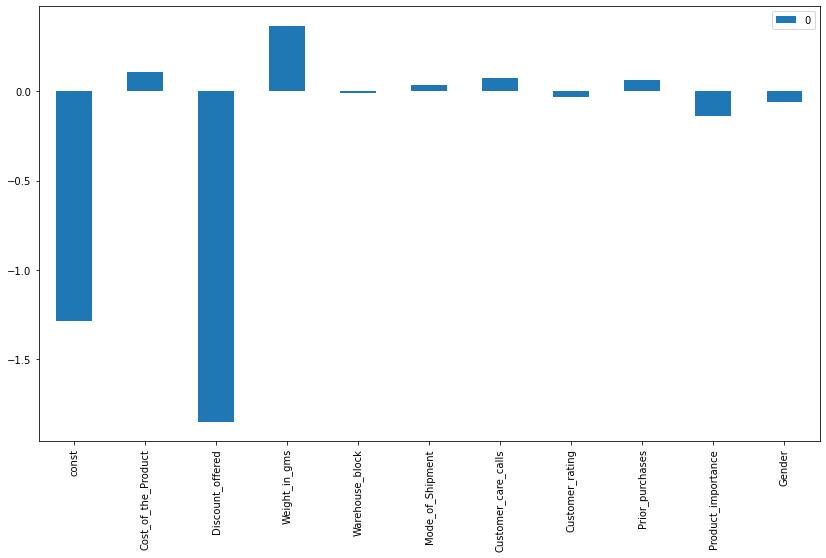

In [164]:
pd.DataFrame(base_model.params).plot(kind='bar',figsize=(14,8))

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
y = dff['Reached.on.Time_Y.N']
x= dff.drop('Reached.on.Time_Y.N',1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=18)

In [167]:
dt= DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)

In [168]:
metrics.recall_score(y_train,dt_model.predict(x_train))

1.0

In [169]:
metrics.recall_score(y_test,dt_model.predict(x_test))

0.5570776255707762

In [170]:
print(metrics.classification_report(y_test,dt_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1986
           1       0.56      0.56      0.56      1314

    accuracy                           0.65      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.65      0.65      3300



In [171]:
metrics.confusion_matrix(y_test,dt_model.predict(x_test))

array([[1410,  576],
       [ 582,  732]], dtype=int64)

<AxesSubplot:>

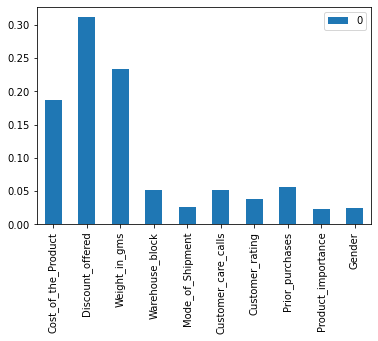

In [172]:
pd.DataFrame(dt_model.feature_importances_,x.columns).plot(kind='bar')

logistic regression can be built using the significant features, if feature contributes more and if its not significant we can do an interaction between features and see wheather we can improve the score.

decision tree is overfitting so we can use other tree models such as bagging and boosting and see wheather we can improve the score.

we can use knn imputer to treat the missing value and see wheather the model has improved


we can use a different encoding technic and see wheather the model has improved

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
Y = dff['Reached.on.Time_Y.N']
X = dff.drop('Reached.on.Time_Y.N',1)

In [175]:
score_list=[]
def score(model_name, model):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
    model.fit(x_train,y_train)
    score_list.append([model_name,metrics.precision_score(y_test,model.predict(x_test))])

In [176]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [177]:
lr= LogisticRegression()
nb= GaussianNB()
knn= KNeighborsClassifier()
rf= RandomForestClassifier()
ada= AdaBoostClassifier()
gb= GradientBoostingClassifier()
xg= XGBClassifier()

In [178]:
score('logistic regression',lr)
score('Naive bayes',nb)
score('knn',knn)
score('random forest',rf)
score('adaboost',ada)
score('gradientboosting',gb)
score('xgboost',xg)

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [179]:
model_score = pd.DataFrame(score_list, columns=['Model','presicion score'])

In [180]:
model_score= model_score.set_index('Model')

In [181]:
model_score

,presicion score
Model,
logistic regression,0.543648
Naive bayes,0.530057
knn,0.540268
random forest,0.561006
adaboost,0.556310
gradientboosting,0.557868
xgboost,0.563969


In [182]:
f_important=[]
def important(model_name,model):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
    model.fit(x_train,y_train)
    if model_name== 'logistic regression':
        A= list(pd.DataFrame(model.coef_.reshape(10,1),index=X.columns).sort_values(by=0,ascending=False).head(3).index)
        for i in A:
            if i not in f_important:
                f_important.append(i)
    else:
        A= list(pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).head(3).index)
        for i in A:
            if i not in f_important:
                f_important.append(i)

In [183]:
important('logistic regression',lr)
important('random forest',rf)
important('adaboost',ada)
important('gradientboosting',gb)
important('xgboost',xg)

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [184]:
f_important

['Weight_in_gms',
 'Cost_of_the_Product',
 'Customer_care_calls',
 'Discount_offered',
 'Prior_purchases']

In [185]:
Y = dff['Reached.on.Time_Y.N']
X = dff[['Weight_in_gms','Cost_of_the_Product','Customer_care_calls','Discount_offered','Prior_purchases']]

In [186]:
score('logistic regression (important)',lr)
score('Naive bayes (important)',nb)
score('knn (important)',knn)
score('random forest (important)',rf)
score('adaboost (important)',ada)
score('gradientboosting (important)',gb)
score('xgboost (important)',xg)

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [187]:
model_score = pd.DataFrame(score_list, columns=['Model','presicion score'])
model_score= model_score.set_index('Model')
model_score

,presicion score
Model,
logistic regression,0.543648
Naive bayes,0.530057
knn,0.540268
random forest,0.561006
adaboost,0.556310
gradientboosting,0.557868
xgboost,0.563969
logistic regression (important),0.536011
Naive bayes (important),0.530779


In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
# para=[{'n_neighbors':np.arange(3,100,2)}]
#knn= KNeighborsClassifier()
#grid= GridSearchCV(estimator=knn,param_grid=para,cv=3,scoring='precision')
#grid.fit(x,y)

In [190]:
#grid.best_estimator_

In [191]:
knn= KNeighborsClassifier(n_neighbors=45)

In [192]:
score('knn tuned parameter',knn)

In [193]:
ada= AdaBoostClassifier(n_estimators=15,learning_rate=.1)
score('adaboost tuned parameter',ada)

In [194]:
xg= XGBClassifier(n_estimators=12,max_depth=8,learning_rate=.2)
score('xg tuned parameter',xg)

[17:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [195]:
model_score = pd.DataFrame(score_list, columns=['Model','presicion score'])
model_score= model_score.set_index('Model')
model_score

,presicion score
Model,
logistic regression,0.543648
Naive bayes,0.530057
knn,0.540268
random forest,0.561006
adaboost,0.556310
gradientboosting,0.557868
xgboost,0.563969
logistic regression (important),0.536011
Naive bayes (important),0.530779


In [196]:
df2= df.copy()

In [197]:
df2.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4.0,2.0,177.0,3.0,low,F,44.0,1233.0,1
1,F,Flight,4.0,5.0,216.0,2.0,low,M,59.0,3088.0,1


In [198]:
cat.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
0,3,0,4.0,2.0,3.0,0.0,0,1
1,4,0,4.0,5.0,2.0,0.0,1,1


In [199]:
num= df2[['Cost_of_the_Product','Discount_offered','Weight_in_gms']]

In [200]:
dff2= pd.concat([num,cat],axis=1)

In [201]:
dff2.head(2)

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
0,177.0,44.0,1233.0,3,0,4.0,2.0,3.0,0.0,0,1
1,216.0,59.0,3088.0,4,0,4.0,5.0,2.0,0.0,1,1


In [202]:
dff2['Prior_purchases'].value_counts()

3.0     3969
2.0     2595
4.0     2150
5.0     1285
6.0      560
10.0     176
7.0      136
8.0      128
Name: Prior_purchases, dtype: int64

In [203]:
dff2['Prior_purchases'].replace({10.0:6.0,7.0:6.0,8.0:6.0},inplace=True)

In [204]:
dff2['Prior_purchases'].value_counts()

3.0    3969
2.0    2595
4.0    2150
5.0    1285
6.0    1000
Name: Prior_purchases, dtype: int64

In [205]:
dff2['Customer_care_calls'].value_counts()

4.0    3545
3.0    3214
5.0    2324
6.0    1017
2.0     645
7.0     254
Name: Customer_care_calls, dtype: int64

In [206]:
dff2['Customer_care_calls'].replace({2.0:3.0,7.0:6.0},inplace=True)

In [207]:
dff2['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [208]:
dff2['Reached.on.Time_Y.N'].replace({1:0,0:1},inplace=True)

In [209]:
dff2.head(1)

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
0,177.0,44.0,1233.0,3,0,4.0,2.0,3.0,0.0,0,0


In [210]:
dff2[['Cost_of_the_Product','Discount_offered','Weight_in_gms']]=np.log(dff2[['Cost_of_the_Product','Discount_offered','Weight_in_gms']])

In [211]:
X= dff2.drop('Reached.on.Time_Y.N',1)
Y= dff2['Reached.on.Time_Y.N']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
xg= XGBClassifier()
xg.fit(x_train,y_train)
metrics.precision_score(y_test,xg.predict(x_test))

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5562579013906448

In [212]:
from imblearn.over_sampling import RandomOverSampler

In [213]:
Y = dff['Reached.on.Time_Y.N']
X = dff[['Weight_in_gms','Cost_of_the_Product','Customer_care_calls','Discount_offered','Prior_purchases']]

In [214]:
Y.value_counts()

0    6563
1    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [215]:
os= RandomOverSampler(sampling_strategy='minority')

In [216]:
X,Y=os.fit_resample(X,Y)

In [217]:
Y.value_counts()

0    6563
1    6563
Name: Reached.on.Time_Y.N, dtype: int64

In [218]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
xg= XGBClassifier()
xg.fit(x_train,y_train)
print(metrics.classification_report(y_test,xg.predict(x_test)))

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.56      0.67      1998
           1       0.66      0.88      0.76      1940

    accuracy                           0.72      3938
   macro avg       0.75      0.72      0.71      3938
weighted avg       0.75      0.72      0.71      3938



In [233]:
# making not reached on time as minority

In [228]:
dff["Reached.on.Time_Y.N"].value_counts()

0    6563
1    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [229]:
dff['Reached.on.Time_Y.N'].replace({1.0:0,0.0:1},inplace=True)

In [230]:
dff["Reached.on.Time_Y.N"].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [231]:
N= dff.copy()

In [234]:
import random

In [239]:
k= random.sample(population=list(N[N['Reached.on.Time_Y.N']==1].index),k=3000)

In [242]:
N.drop(k,inplace=True)

In [243]:
N["Reached.on.Time_Y.N"].value_counts()

0    4436
1    3563
Name: Reached.on.Time_Y.N, dtype: int64

In [244]:
Y = N['Reached.on.Time_Y.N']
X = N.drop('Reached.on.Time_Y.N',1)

In [245]:
Y.value_counts()

0    4436
1    3563
Name: Reached.on.Time_Y.N, dtype: int64

In [247]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
xg= XGBClassifier()
xg.fit(x_train,y_train)
print(metrics.classification_report(y_test,xg.predict(x_test)))

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1322
           1       0.78      0.54      0.64      1078

    accuracy                           0.73      2400
   macro avg       0.74      0.71      0.71      2400
weighted avg       0.74      0.73      0.72      2400



In [248]:
new_score_list=[]
def score(model_name, model):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
    model.fit(x_train,y_train)
    new_score_list.append([model_name,metrics.precision_score(y_test,model.predict(x_test))])

In [249]:
lr= LogisticRegression()
nb= GaussianNB()
knn= KNeighborsClassifier()
rf= RandomForestClassifier()
ada= AdaBoostClassifier()
gb= GradientBoostingClassifier()
xg= XGBClassifier()

In [250]:
score('logistic regression',lr)
score('Naive bayes',nb)
score('knn',knn)
score('random forest',rf)
score('adaboost',ada)
score('gradientboosting',gb)
score('xgboost',xg)

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [251]:
tnew_score_list=[]
def tscore(model_name, model):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
    model.fit(x_train,y_train)
    tnew_score_list.append(metrics.precision_score(y_train,model.predict(x_train)))

In [252]:
tscore('logistic regression',lr)
tscore('Naive bayes',nb)
tscore('knn',knn)
tscore('random forest',rf)
tscore('adaboost',ada)
tscore('gradientboosting',gb)
tscore('xgboost',xg)

C:\Users\balar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [253]:
nmodel_score = pd.DataFrame(new_score_list, columns=['Model','precision score(test)'])
nmodel_score= nmodel_score.set_index('Model')
nmodel_score

,precision score(test)
Model,
logistic regression,0.824013
Naive bayes,0.997722
knn,0.699017
random forest,0.880065
adaboost,0.947467
gradientboosting,0.919105
xgboost,0.780000


In [254]:
nmodel_score['precision score (training)']= tnew_score_list
nmodel_score

,precision score(test),precision score (training)
Model,,
logistic regression,0.824013,0.857670
Naive bayes,0.997722,0.999008
knn,0.699017,0.842162
random forest,0.880065,1.000000
adaboost,0.947467,0.967901
gradientboosting,0.919105,0.964122
xgboost,0.780000,0.997117


In [265]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=18)
ada= AdaBoostClassifier()
ada.fit(x_train,y_train)
print(metrics.classification_report(y_test,ada.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81      1322
           1       0.95      0.47      0.63      1078

    accuracy                           0.75      2400
   macro avg       0.82      0.72      0.72      2400
weighted avg       0.81      0.75      0.73      2400



<AxesSubplot:>

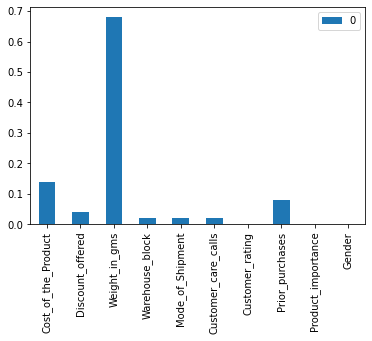

In [259]:
pd.DataFrame(ada.feature_importances_,index=X.columns).plot(kind='bar')